# MAP654I: Practical Introduction to Machine Learning  
## Practical Session 1: Unsupervised Learning
### <span style="color:orange;">*Temperature dataset* 🔥

#### Importing libraries

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Loading data

In [2]:
x1 = np.load("temper.npz") #load the data

#### Data exploration

In [13]:
x1.files 

['villes', 'data', 'varname']

In [14]:
# Load the data matrix, cities, and variable names from the dataset
data_matrix = x1['data']      # Contains the main data
villes = x1['villes']         # List of cities
varname = x1['varname']       # Names of the variables/columns

# Extract the temperature matrix (first 12 columns)
temperature_matrix = data_matrix[:, :12]

# Display the extracted temperature matrix
print("Matrice des températures (15x14) :")
print(temperature_matrix)

# Display the list of cities
print("\nListe des villes :")
print(villes)

# Display the names of the variables/columns
print("\nNoms des variables/colonnes :")
print(varname)

Matrice des températures (15x14) :
[[ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.   6.5]
 [ 5.   5.3  8.4 10.8 13.9 17.2 18.8 18.6 16.4 12.2  8.2  5.5]
 [ 7.5  8.5 10.8 13.3 16.7 20.1 22.7 22.5 20.3 16.  11.5  8.2]
 [ 3.4  4.1  7.6 10.7 14.3 17.5 19.1 18.7 16.  11.4  7.1  4.3]
 [ 4.8  5.3  7.9 10.1 13.1 16.2 17.9 17.8 15.7 11.6  7.8  5.4]
 [ 0.4  1.5  5.6  9.8 14.  17.2 19.  18.3 15.1  9.5  4.9  1.3]
 [ 4.7  5.6  9.2 11.6 14.9 18.7 20.9 20.9 18.3 13.3  8.6  5.5]
 [ 2.4  3.4  7.1  9.9 13.6 17.1 19.3 18.8 16.  11.   6.6  3.4]]

Liste des villes :

#### Monthly Average Temperature Calculation and Visualization

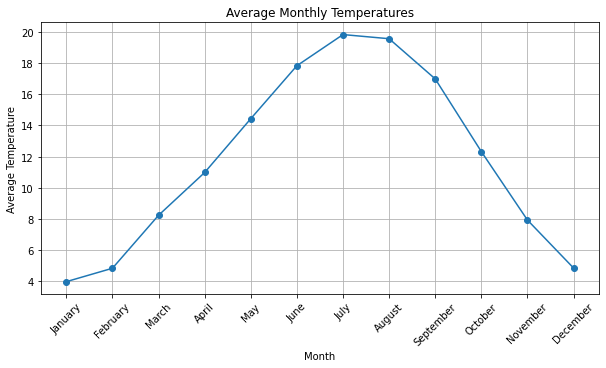

In [15]:
# Calculate the averages for each month
mean_temperatures = np.mean(temperature_matrix, axis=0)

# Visualize the averages with plt.plot
plt.figure(figsize=(10, 5))
plt.plot(mean_temperatures, marker='o')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(ticks=np.arange(12), labels=x1['varname'][:12], rotation=45)
plt.grid(True)
plt.show()

This code snippet calculates and visualizes the average monthly temperatures using data from the `temperature_matrix`. The plot shows that higher temperatures are observed in the summer months (June, July, and August) and lower temperatures in the winter months (December, January, and February). 

#### Temperature Curves Plotting for Each City

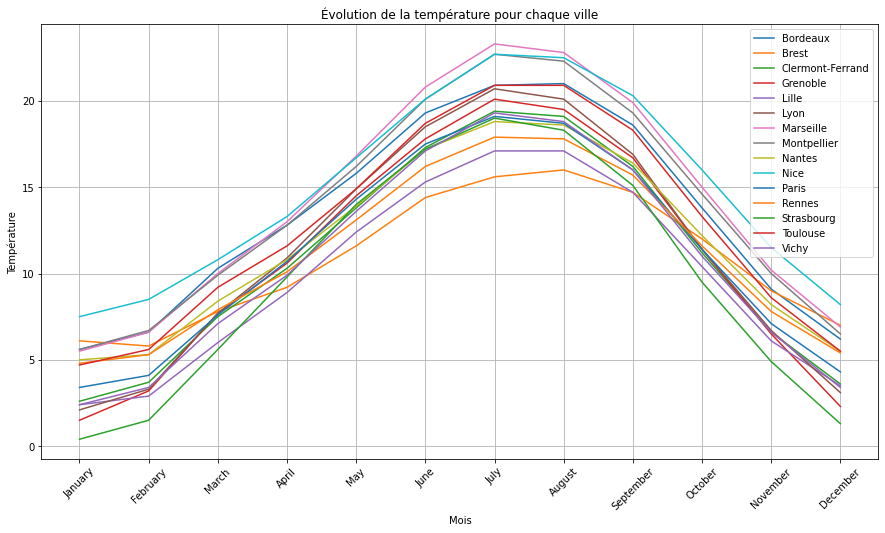

In [6]:
# Plot the temperature curves for each city
plt.figure(figsize=(15, 8))
for i in range(temperature_matrix.shape[0]):
    plt.plot(temperature_matrix[i], label=villes[i])

plt.title("Temperature Variation for Each City")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.xticks(ticks=np.arange(12), labels=x1['varname'][:12], rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

The graph displays the monthly temperature variations for different cities in France over the course of a year. Most cities show a similar trend, with temperatures increasing from January to July, peaking in the summer months, and then gradually decreasing towards December.

Overall, this graph provides a clear visual comparison of the temperature trends for different cities, highlighting both common patterns and unique characteristics of each location throughout the year.

#### Extracting and Plotting City Positions

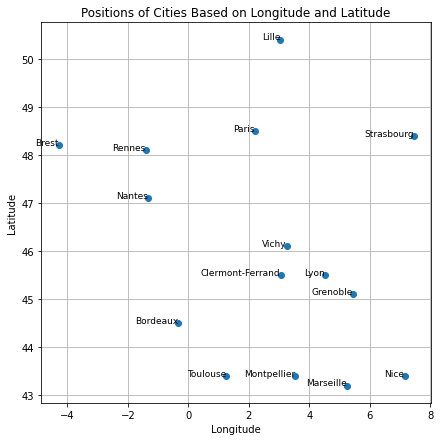

In [19]:
# Extract the latitude and longitude columns
latitude = x1['data'][:, 12]
longitude = x1['data'][:, 13]

# Extract the list of cities
cities = x1['villes']

# Plot the positions of the cities
plt.figure(figsize=(7, 7))
plt.scatter(longitude, latitude, marker='o')

# Annotate each point with the city name
for i, city in enumerate(cities):
    plt.text(longitude[i], latitude[i], city, fontsize=9, ha='right')

plt.title("Positions of Cities Based on Longitude and Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

#### K-means clustering 

##### Elbow method for determining the optimum number of clusters

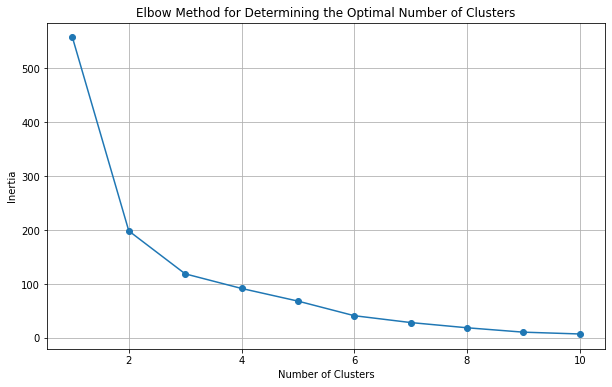

In [20]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(temperature_matrix)
    inertias.append(kmeans.inertia_)

# Plot the inertia curve as a function of the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

We observe that the elbow occurs at \( k = 2 \), where the distortion value begins to decline at a slower pace. However, at \( k = 3 \), the distortion value continues to decrease at a notable rate. Consequently, both \( k = 2 \) and \( k = 3 \) can be considered for analysis and comparison of the results.

#### Training the K-means model

##### *k_optimal = 2*

Here, we will train the K-means model with \( k = 2 \) and visualize the clusters. The algorithm is trained based on the temperature data for each city.

In [21]:
# Choose the number of clusters
k_optimal = 2

# Apply the KMeans algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42) # random_state=42 for reproducibility
clusters = kmeans.fit_predict(temperature_matrix)

#### Cluster display by longitude and latitude

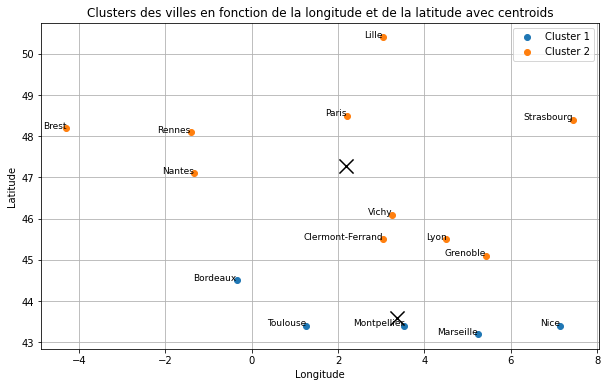

In [22]:
# Calculer les centroids en utilisant les latitudes et longitudes moyennes des clusters
centroids = np.zeros((k_optimal, 2))
for cluster in range(k_optimal):
    centroids[cluster, 0] = np.mean(longitude[clusters == cluster])
    centroids[cluster, 1] = np.mean(latitude[clusters == cluster])

# Visualiser les clusters en fonction de la longitude et de la latitude
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.scatter(longitude[clusters == cluster], latitude[clusters == cluster], label=f'Cluster {cluster + 1}', cmap='tab10', vmax=9)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='x', s=200, c='black')  # Afficher les centroids

# Annoter chaque point avec le nom de la ville
villes = x1['villes']
for i, ville in enumerate(villes):
    plt.text(longitude[i], latitude[i], ville, fontsize=9, ha='right')

plt.title("Clusters des villes en fonction de la longitude et de la latitude avec centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

##### Display the average temperature curve for each cluster 

### k_optimal = 3

In [11]:
# Choix du nombre de clusters
k_optimal = 3

# Appliquer l'algorithme KMeans
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(temperature_matrix)

#### Affichage des clusters en fonction de la longitude et de la latitude

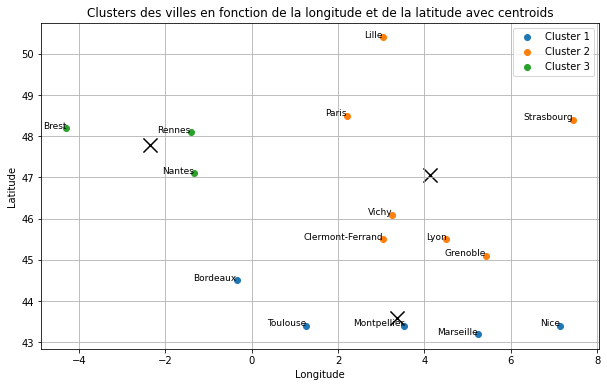

In [12]:
# Calculer les centroids en utilisant les latitudes et longitudes moyennes des clusters
centroids = np.zeros((k_optimal, 2))
for cluster in range(k_optimal):
    centroids[cluster, 0] = np.mean(longitude[clusters == cluster])
    centroids[cluster, 1] = np.mean(latitude[clusters == cluster])

# Visualiser les clusters en fonction de la longitude et de la latitude
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.scatter(longitude[clusters == cluster], latitude[clusters == cluster], label=f'Cluster {cluster + 1}', cmap='tab10', vmax=9)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='x', s=200, c='black')  # Afficher les centroids

# Annoter chaque point avec le nom de la ville
villes = x1['villes']
for i, ville in enumerate(villes):
    plt.text(longitude[i], latitude[i], ville, fontsize=9, ha='right')

plt.title("Clusters des villes en fonction de la longitude et de la latitude avec centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()